In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt 
import seaborn as sns
import imageio

In [2]:
class AdaBoost(BaseEstimator):
    def __init__(self, clfs=None, alphas=None, limit=55):
        self.clfs = clfs
        self.alphas = alphas
        self.limit = limit


    def fit(self, x_train, y_train):
        self.clfs = []
        self.alphas = []
        ws = [1 / len(x_train) for _ in x_train.iterrows()]

        for i in range(self.limit):
            clf = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train, sample_weight=ws)
            predicted = [y_true == y_pred for y_true, y_pred in zip(y_train, clf.predict(x))]
            
            error = np.dot(np.logical_not(predicted).astype(int), ws)
            alpha = np.log((1 - error) / error) / 2

            ws = [w * np.exp(-alpha * (1 if p else -1)) for w, p in zip(ws, predicted)]
            ws /= sum(ws)
            
            self.clfs.append(clf)
            self.alphas.append(alpha)

        return self


    def predict(self, x_test):
        all_predictions = np.transpose(list(map(lambda clf: clf.predict(x_test), self.clfs)))
        return [np.sign(np.dot(self.alphas, list(map(int, predictions)))) for predictions in all_predictions]
    
    
    def __getitem__(self, range):
        return AdaBoost(self.clfs[range], self.alphas[range])

In [3]:
df = pd.read_csv('chips.csv')
df.replace({'P': 1, 'N': -1}, inplace=True)
x = df[['x', 'y']]
y = df['class']

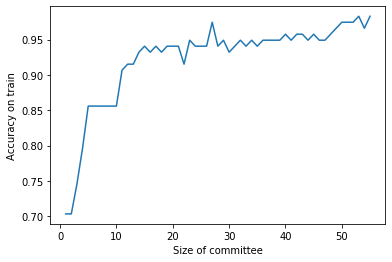

In [4]:
clf = AdaBoost().fit(x, y)
ks = range(1, 55 + 1)
plt.plot(ks, list(map(lambda k: accuracy_score(clf[:k].predict(x), y), ks)))
plt.xlabel('Size of committee')
plt.ylabel('Accuracy on train');

In [8]:
def plot(df, clf, color='CMRmap', name=''):
    x_min = df['x'].min()
    x_max = df['x'].max()
    y_min = df['y'].min()
    y_max = df['y'].max()
    xx = np.ogrid[x_min:x_max:10j]
    yy = np.ogrid[y_min:y_max:10j]
    space = [(xi, yi) for xi in xx for yi in yy]
    x, y = zip(*space)

    background = pd.DataFrame({'x': x, 'y': y, 'class': clf.predict(space)})    
    zz = background['class'].to_numpy().reshape(len(xx), len(yy))
    plt.contourf(yy, xx, zz, cmap=color, alpha=0.8)
    plt.scatter(df['y'], df['x'], c=df['class'], cmap=color)
    plt.title(name)
    plt.savefig(name + '.png')
# colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [7]:
name = lambda k: 'Iteration ' + str(k)

ks = [1, 2, 3, 5, 8, 13, 21, 34, 55]
for k in ks:
    plot(df, clf[:k], name=name(k))

images = []
for filename in map(name, ks):
    for _ in range(3):
        images.append(imageio.imread(filename + '.png'))
imageio.mimsave('evolution.gif', images)

![SegmentLocal](evolution.gif "segment")